<a href="https://colab.research.google.com/github/Boduck/Data-Analysis/blob/main/Netflix_Watch_Log_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Watch Log 분석**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* EDA & Data Preprocessing
* 장치 및 국가별 사용자 행동 패턴 분석
* 검색과 상호작용 간 관계 분석

 ## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ Netflix Watch Log 분석
```  

> **프로젝트유형**

```
▶ Netflix 검색 로그 활용 인사이트 추출

```

> **학습목표**

```
▶ 사용자의 검색 패턴 및 선호도 파악
▶ 국가별, 장치별 접근 패턴 분석
▶ 어린이 프로필 사용 패턴과 일반 프로필의 차이점 파악
▶ 검색과 상호작용 간의 관계 분석
```

> **예상 결과물**

```
▶ Netflix 사용자의 주요 검색 키워드 및 트렌드 보고서
▶ 장치 및 국가별 사용자 행동 패턴 시각화
▶ 검색 로그를 활용한 추천 시스템 개선 방안 제안
```


## **문제상황 Introduction**
---
> **시나리오**

```
넷플릭스는 전세계적으로 수많은 사용자가 다양한 콘텐츠를 시청하는 플랫폼이다. 이런 대규모 플랫폼에서는 사용자의 시청 로그를 분석함으로써 어떤 콘텐츠가
인기가 있고, 어떤 콘텐츠가 특정 지역이나 사용자 그룹에게 인기가 있는지 파악할 수 있다. 넷플릭스는 인사이트 추출을 통해 콘텐츠 제작자나 마케터에게
귀중한 정보를 제공하고자 한다.
```  

> **문제정의**

```
▶ 시청 로그 데이터 기반 콘텐츠 발굴 체계 부족
```  

> **기대효과**

```
▶ 사용자 특성별 타겟 마케팅 아이디어 제공
```

> **해결방안**

```
▶ 사용자 특성 구분에 따른 콘텐츠 선호도 시각화(대시보드 구축)
```

> **성과측정**  

```
▶ 타겟 마케팅 시행 전후 MAU 및 신규 유입자수 비교
```

> **데이터 살펴보기**


| Column Name       | Description                                          |
|:------------------|:-----------------------------------------------------|
| Profile Name      | 사용자 프로필 이름                                    |
| Country Iso Code  | 플랫폼에 접근한 국가 코드                              |
| Device            | 플랫폼에 접근한 장치                                  |
| Is Kids           | 어린이 프로필 지표                                     |
| Query Typed       | 플랫폼에서 검색한 텍스트                               |
| Displayed Name    | 검색 결과에 표시된 텍스트                              |
| Action            | 검색 결과에 대한 사용자 상호작용                       |
| Section           | 결과가 검색 결과를 기반으로 생성되었는지 자동 생성되었는지 여부 |
| Utc Timestamp     | 검색의 타임스탬프                                     |


In [ ]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir("/content/drive/MyDrive/")
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive'

In [ ]:
# ▶ Data read
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('P_PJT19_DATA.csv')
df.head()

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp
0,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19
1,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:18
2,User 4,AE,Device 0,0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07
3,User 4,AE,Device 0,0,NaN,NaN,select,prequery_results,2022-08-01 13:59:03
4,User 4,AE,Device 0,0,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23


- timestamp
- Query Type, Displayed Names는 텍스트 데이터



# EDA & Data Preprocessing
---
> 요약

```
- 약 1.5년의 기간의 2,616행의 데이터
- Timestamp와 범주형 변수, 텍스트 변수들로 이루어진 데이터셋
- 텍스트 데이터(검색, 검색결과에 표시된 텍스트) 외에는 결측치가 없음
- 모든 데이터에 대해 값이 동일한 상수 컬럼 Is Kids(어린이 프로필 지표) 컬럼은 정보성이 없는 변수
- 같은 프로필 이름에도 다른 국가일 수 있음
```

> 변수 세부 탐색

```
* 사용자 프로필 이름
  - User 0 ~ User 8 총 9가지의 프로필 이름
  
* Country Iso Code(국가 코드)
  - IN(인도), AE(아랍에미리트), CA(캐나다), FR(프랑스), CR(코스타리카) 총 5개국의 데이터
  - CA(캐나다), FR(프랑스), CR(코스타리카)의 경우, 각각 17개, 8개, 1개로 다른 국가코드에 비해 부족한 데이터 수
  - IN, AE를 중점적으로 분석하는 것이 유의미한 분석일 것으로 판단

* Device(장치)
  - Device 0 ~ Device 5 총 6가지의 장치
  - 불균형한 데이터

* Action(상호작용)
  - 검색 결과에 대한 사용자 상호작용
  - select, play, add 3가지 행동으로 구분

* Section(검색결과 생성방법)
 - 자동 생성되었는지, 검색 결과를 기반으로 생성되었는지
 - 약 30:10:1 의 비율로 불균형해보이는 범주형 데이터

```

## 과정

In [ ]:
df.shape

(2616, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Profile Name      2615 non-null   object
 1   Country Iso Code  2615 non-null   object
 2   Device            2615 non-null   object
 3   Query Typed       1889 non-null   object
 4   Displayed Name    1798 non-null   object
 5   Action            2615 non-null   object
 6   Section           2615 non-null   object
 7   Utc Timestamp     2615 non-null   object
dtypes: object(8)
memory usage: 163.6+ KB


In [ ]:
df.isnull().sum()

Profile Name          0
Country Iso Code      0
Device                0
Is Kids               0
Query Typed         727
Displayed Name      818
Action                0
Section               0
Utc Timestamp         0
dtype: int64

- 텍스트 데이터(검색, 검색결과에 표시된 텍스트) 외에는 결측치가 없음

In [ ]:
df['Utc Timestamp'] = pd.to_datetime(df['Utc Timestamp'])
df.head()

,Profile Name,Country Iso Code,Device,Query Typed,Displayed Name,Action,Section,Utc Timestamp
0,User 4,AE,Device 0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:19
1,User 4,AE,Device 0,NaN,NaN,select,prequery_results,2022-08-01 13:59:18
2,User 4,AE,Device 0,NaN,"Manifest: Season 1: ""Pilot""",play,prequery_results,2022-08-01 13:59:07
3,User 4,AE,Device 0,NaN,NaN,select,prequery_results,2022-08-01 13:59:03
4,User 4,AE,Device 0,the gray,The Gray Man,add,title_results,2022-07-17 13:59:23


In [ ]:
print(df['Utc Timestamp'].dt.date.min())
print(df['Utc Timestamp'].dt.date.max())

2021-11-26
2023-06-17


- 약 1.5년의 기간의 2,616행의 데이터로 데이터 수가 적고, 트렌드를 파악하기에 부적합하다고 생각됨

In [ ]:
for col in df.columns:
  print(col, df[col].nunique())

Profile Name 9
Country Iso Code 5
Device 6
Is Kids 1
Query Typed 396
Displayed Name 812
Action 3
Section 3
Utc Timestamp 2515


- 모든 데이터에 대해 값이 동일한 상수 컬럼 Is Kids(어린이 프로필 지표) 컬럼은 정보성이 없는 변수
- Timestamp,범주형 변수, 텍스트 변수들로 이루어진 데이터셋

In [ ]:
# 범주형 변수들의 범주별 빈도수 확인
for col in df.drop(['Is Kids','Query Typed','Displayed Name', 'Utc Timestamp'], axis = 1):
  print(df[col].value_counts(), '\n')

Profile Name
User 8    1245
User 4     645
User 7     327
User 6     133
User 5      90
User 1      78
User 2      48
User 0      30
User 3      20
Name: count, dtype: int64 

Country Iso Code
IN    1985
AE     605
CA      17
FR       8
CR       1
Name: count, dtype: int64 

Device
Device 0    2391
Device 1     171
Device 2      28
Device 3      20
Device 4       4
Device 5       2
Name: count, dtype: int64 

Action
select    1867
play       712
add         37
Name: count, dtype: int64 

Section
title_results         1865
prequery_results       685
suggestion_results      66
Name: count, dtype: int64 



- **사용자 프로필 이름**
  - User 0 ~ User 8 총 9가지의 프로필 이름
- **Country Iso Code(국가 코드)**
  - IN(인도), AE(아랍에미리트), CA(캐나다), FR(프랑스), CR(코스타리카) 총 5개국의 데이터
  - CA(캐나다), FR(프랑스), CR(코스타리카)의 경우, 각각 17개, 8개, 1개로 다른 국가코드에 비해 부족한 데이터 수
  - IN, AE를 중점적으로 분석하는 것이 유의미한 분석일 것으로 판단
- **Device(장치)**
  - Device 0 ~ Device 5 총 6가지의 장치
  - 불균형한 데이터
- **Action(상호작용)**
  - 검색 결과에 대한 사용자 상호작용
  - select, play, add 3가지 행동으로 구분
- **Section(검색결과 생성방법)**
 - 자동 생성되었는지, 검색 결과를 기반으로 생성되었는지
 - 약 30:10:1 의 비율로 불균형해보이는 범주형 데이터

In [ ]:
# 같은 프로필 이름에도 다른 국가일 수 있음
df.groupby(['Profile Name', 'Country Iso Code']).size()

Profile Name  Country Iso Code
User 0        AE                    23
              IN                     7
User 1        IN                    78
User 2        IN                    48
User 3        IN                    20
User 4        AE                   582
              CA                    17
              FR                     8
              IN                    37
User 5        IN                    90
User 6        IN                   133
User 7        IN                   327
User 8        IN                  1245
dtype: int64

# 장치 및 국가별 사용자 행동 패턴 분석
---
* 1개의 데이터만 가지고 있는 CR(코스타리카) 데이터 확인
* Device(플랫폼에 접근한 장치), Country Iso Code(플랫폼에 접근한 국가 코드)

In [ ]:
# 1개의 데이터만 가지고 있는 CR(코스타리카) 데이터 확인
df[df['Country Iso Code'] == 'CR']

,Profile Name,Country Iso Code,Device,Is Kids,Query Typed,Displayed Name,Action,Section,Utc Timestamp
559,User 4,CR,Device 0,0,NaN,NaN,select,prequery_results,2022-02-07 03:20:10


- 검색 텍스트는 모두 없음
- 다른 범주형 데이터(Profile Name, Device, Action, Section)에 대해서도 상위 첫번째, 두번째로 많은 빈도 수를 보이는 범주에 포함
- 삭제해도 무방하다고 판단

In [ ]:
# 정보성 없는 데이터 삭제
df.drop(df[df['Country Iso Code'] == 'CR'].index, inplace=True) # 국가 코드가 코스타리카인 데이터 행 삭제
df.drop(['Is Kids'], axis = 1, inplace=True) # 상수 컬럼
df.reset_index(drop=True, inplace = True)

## 국가별 Action, Section 시각화

> 국가별 장치별 빈도수

```
인도(IN) 외의 국가들은 모두 Device 0 장치를 통해 플랫폼 접근
```

> 국가별 Action, Section 시각화

```
1. Action, Section별 빈도수 계산 후 시각화(데이터 수 많은 국가 순으로 보이도록)
2. 행별로 국가 구분하여 시각화(즉, 행의 수 = 국가의 수)
```

> 장치별 Action, Section 시각화

```
모두 인도(IN)에서 발생한 데이터임을 감안하고 분석
```

In [ ]:
df.groupby(['Country Iso Code','Device']).size() # 국가별 장치별 빈도수 : IN(인도) 외의 국가들은 모두 Device 0 장치를 통해 플랫폼 접근

Country Iso Code  Device  
AE                Device 0     605
CA                Device 0      17
FR                Device 0       8
IN                Device 0    1760
                  Device 1     171
                  Device 2      28
                  Device 3      20
                  Device 4       4
                  Device 5       2
dtype: int64

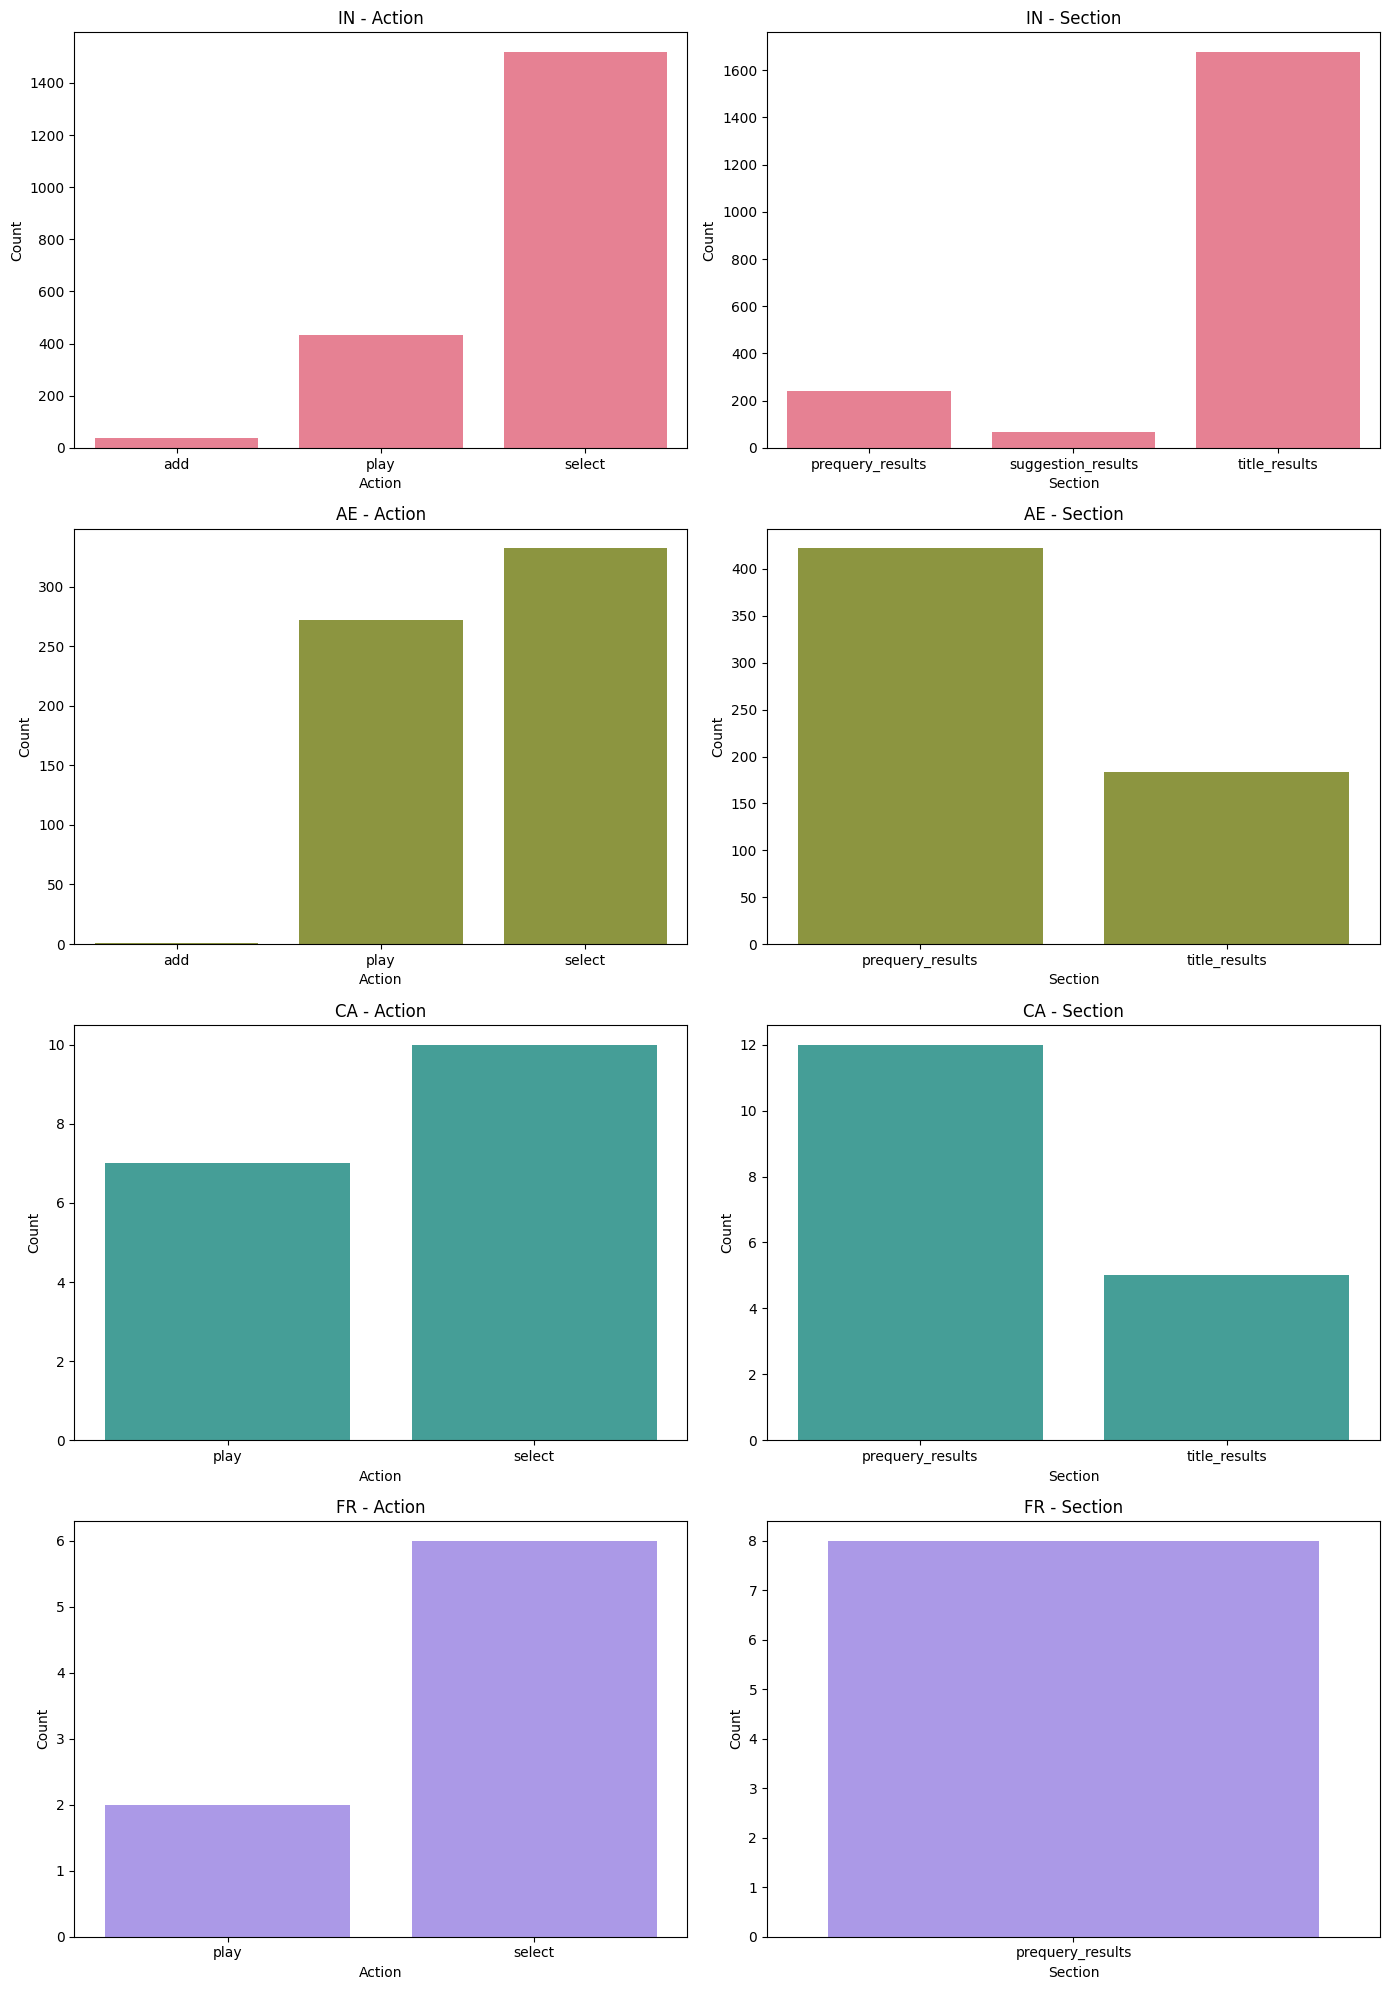

In [ ]:
# 국가만 구분해서 분석 - 국가별 특징 발견이 되면, 장치 구분은 무의미함(인도가 다른 종류의 장치 데이터를 가지고 있는데, 국가별로 사용자 행동의 특징 구분이 된다고 하면..)

# Action, Section별 빈도수 계산 후 시각화
frequency_action = df.groupby(['Country Iso Code', 'Action']).size().reset_index(name='Count')
frequency_section = df.groupby(['Country Iso Code', 'Section']).size().reset_index(name='Count')

# 국가별 데이터 수 계산 및 내림차순 정렬
sorted_countries = df['Country Iso Code'].value_counts().index.tolist()

# 국가별 색깔 구분
palette = sns.color_palette("husl", len(sorted_countries))
country_color_map = dict(zip(sorted_countries, palette))

fig, axes = plt.subplots(len(sorted_countries), 2, figsize=(14, 5 * len(sorted_countries))) # 서브플롯 설정 (행: 국가 코드 수, 열: 2)

for i, country in enumerate(sorted_countries):
    # Action 빈도수 플롯
    sns.barplot(
        data=frequency_action[frequency_action['Country Iso Code'] == country], x='Action', y='Count', palette=[country_color_map[country]],ax=axes[i, 0]
        ).set(title=f'{country} - Action')
    axes[i, 0].set_xlabel('Action')
    axes[i, 0].set_ylabel('Count')

    # Section 빈도수 플롯
    sns.barplot(
        data=frequency_section[frequency_section['Country Iso Code'] == country], x='Section', y='Count', palette=[country_color_map[country]], ax=axes[i, 1]
        ).set(title=f'{country} - Section')
    axes[i, 1].set_xlabel('Section')
    axes[i, 1].set_ylabel('Count')

# 레이아웃 조정
plt.tight_layout()
plt.show()

- 프랑스(FR)와 캐나다(CA)의 데이터수는 매우 적기 때문에, 행동 패턴에 대한 인사이트는 얻기 어렵고 참고용으로만 확인.
- 가장 많은 데이터 수를 가지고 있는 인도(IN)의 경우, 대부분 title_results 기반으로 결과가 생성되지만, 다른 국가들은 모두 prequery_results 기반으로 결과가 생성되는 행동 패턴이 확인됨.
- 검색과 상호작용 간의 관계 분석을 통해 해당 패턴에 대한 인사이트 발굴

## 장치별 Action, Section 시각화
---
- Device 0 외의 장치들은 모두 인도(IN)에서 발생한 데이터임을 감안

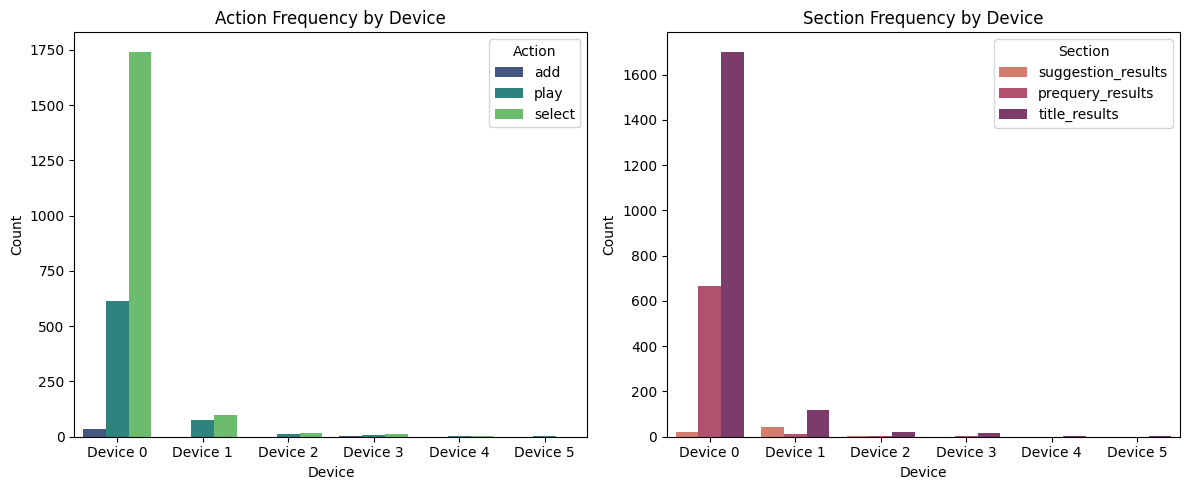

In [ ]:
#장치별 Action, Section 시각화
frequency_action = df.groupby(['Device', 'Action']).size().reset_index(name='Count')
frequency_section = df.groupby(['Device', 'Section']).size().reset_index(name='Count')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=frequency_action, x='Device', y='Count', hue='Action', palette='viridis').set(title='Action Frequency by Device', xlabel='Device', ylabel='Count')

plt.subplot(1, 2, 2)
sns.barplot(data=frequency_section, x='Device', y='Count', hue='Section', palette='flare').set(title='Section Frequency by Device', xlabel='Device', ylabel='Count')

plt.tight_layout()
plt.show()

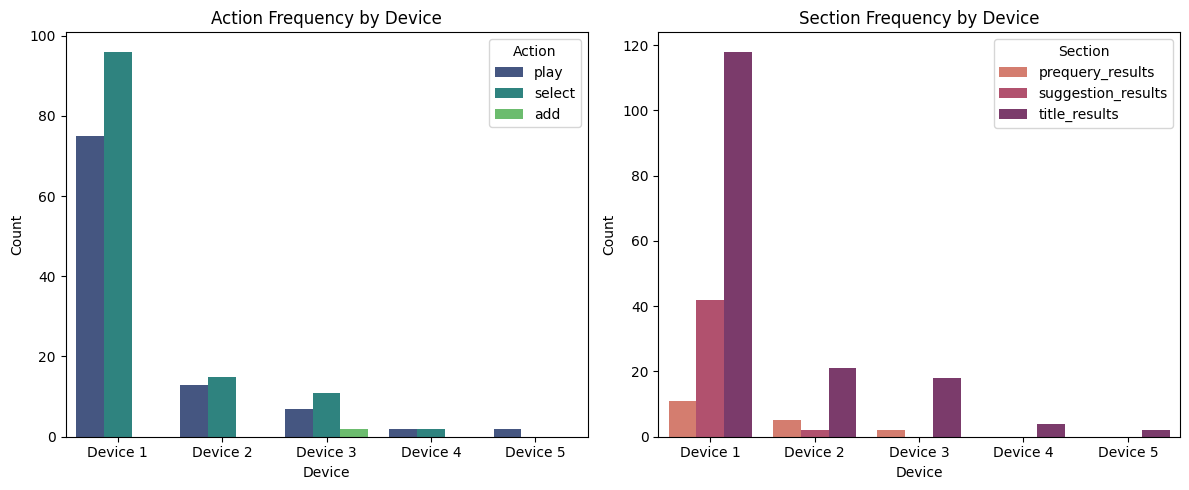

In [ ]:
# Device 0 장치 제외 시각화
tmp = df.drop(df[df['Device'] == 'Device 0'].index)

frequency_action = tmp.groupby(['Device', 'Action']).size().reset_index(name='Count').sort_values(by=['Device','Count'])
frequency_section = tmp.groupby(['Device', 'Section']).size().reset_index(name='Count').sort_values(by=['Device','Count'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=frequency_action, x='Device', y='Count', hue='Action', palette='viridis').set(title='Action Frequency by Device', xlabel='Device', ylabel='Count')

plt.subplot(1, 2, 2)
sns.barplot(data=frequency_section, x='Device', y='Count', hue='Section', palette='flare').set(title='Section Frequency by Device', xlabel='Device', ylabel='Count')

plt.tight_layout()
plt.show()

- Device 0 외의 장치들은 모두 인도(IN)에서 발생한 데이터임을 감안
- Action(검색 결과에 대한 사용자 상호작용)
  - 다른 장치들과 비교해봤을 때, Device 3 장치의 경우, add 상호작용이 발생하는 편임이 확인됨
  - 전반적으로 select가 play 발생 빈도보다 높은 경향을 보이나, Device 4 장치에서는 비슷한 빈도로 발생함
- Section(결과가 검색 결과를 기반으로 생성되었는지, 자동 생성되었는지 여부)
  - suggestion_results를 기반으로 결과를 생성하는 행동은, Device 1 외의 장치에서 거의 발생하지 않음
  - 대부분 title_results를 기반으로 결과가 생성되지만, 이는 모두 인도(IN)에서 발생한 데이터여서 발생한 현상일 수 있음

# 검색과 상호작용 간 관계 분석
---
1) 텍스트 데이터(Query Typed, Displayed Name)가 NA인것과 아닌것 구분해서 변수별 관계 분석
  - Group 변수 생성 : 두 컬럼의 NA 유무 구분에 따라 총 4개의 그룹으로 분류
    - A: 둘다 결측 X
    - B: 표시텍스트(Displayed Name)만 결측
    - C: 검색텍스트(Query Typed)만 결측
    - D: 둘다 결측
  - Country Iso Code, Device, Action, Section 4가지 범주형 변수와 Group 변수와의 관계를 확인
  - 범주형 변수 내 불균형이 심한 것을 고려하여, 각 범주 내의 비율로 시각화
    - Country Iso Code : 대부분이 IN(인도) 데이터
    - Device : 대부분이 Device 0이며, 다른 장치 데이터가 있는 국가는 IN(인도) 뿐임
    - Action : 대부분 select
    - Section : 대부분 title_results

2) 주요 키워드 추출 : 검색 데이터(Query Typed) 활용

## NA 유무 구분에 따른 분석
---
- A그룹 多: **검색**을 통한 이용을 선호한다고 볼 수 있다.
- D그룹 多: **자동 생성**되는 기능에 대한 이용도가 높다고 볼 수 있다.
- B그룹(표시텍스트 결측), C그룹(검색텍스트 결측) 빈도수 비교
  - B그룹이 C그룹에 비해 검색 기능 이용도가 높다고 해석 가능
  - A,B그룹 - **검색** 기능 이용도가 높음
  - C,D그룹 - **자동 생성**되는 기능에 대한 이용도가 높음



In [ ]:
# Query Typed, Displayed Name 컬럼 - NA 유무에 따른 범주형 변수 생성
# 플랫폼에서 검색한 테스트, 검색결과에 표시된 텍스트 모두 NA : 클릭으로만 이루어진 결과?
df['Query Typed NA'] = df['Query Typed'].isna().map({True: 'NA', False: 'Not NA'})
df['Displayed Name NA'] = df['Displayed Name'].isna().map({True: 'NA', False: 'Not NA'})

In [ ]:
# Query Typed NA와 Displayed Name NA에 따라 그룹 A, B, C, D 분류
conditions = [
    (df['Query Typed NA'] == 'Not NA') & (df['Displayed Name NA'] == 'Not NA'),
    (df['Query Typed NA'] == 'Not NA') & (df['Displayed Name NA'] == 'NA'),
    (df['Query Typed NA'] == 'NA') & (df['Displayed Name NA'] == 'Not NA'),
    (df['Query Typed NA'] == 'NA') & (df['Displayed Name NA'] == 'NA')
    ]

choices = ['A', 'B', 'C', 'D']
df['Group'] = np.select(conditions, choices, default='Unknown')

df.groupby(['Group','Query Typed NA','Displayed Name NA']).size().reset_index(name='Count')

,Group,Query Typed NA,Displayed Name NA,Count
0,A,Not NA,Not NA,1401
1,B,Not NA,NA,488
2,C,NA,Not NA,397
3,D,NA,NA,329


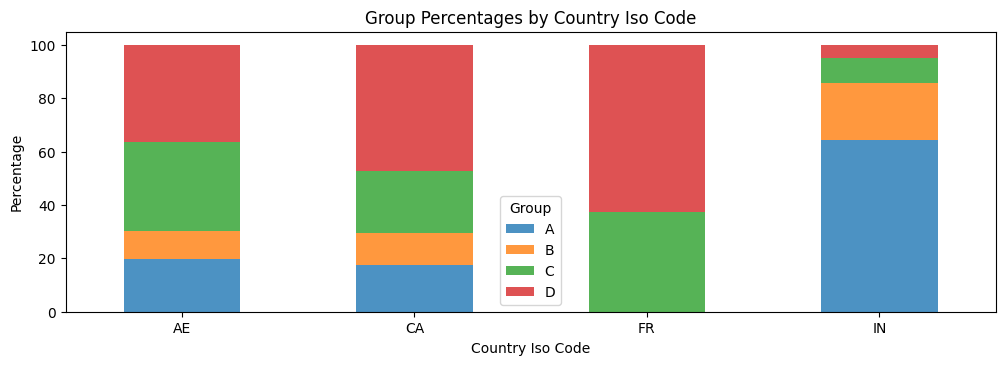

In [ ]:
# Country Iso Code별 시각화
group_counts = df.groupby(['Country Iso Code', 'Group']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(12, 8))

# 비율 그래프 그리기
bars = group_percentages.plot(kind='bar', stacked=True, alpha=0.8, ax=plt.subplot(212))
plt.title('Group Percentages by Country Iso Code')
plt.xlabel('Country Iso Code')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Group')

- 가장 많은 데이터수를 가지고 있는 IN(인도)는 대부분 A그룹(둘다 결측 X)
- 다른 국가들은 대부분 D그룹(둘다 결측)인 것이 보임

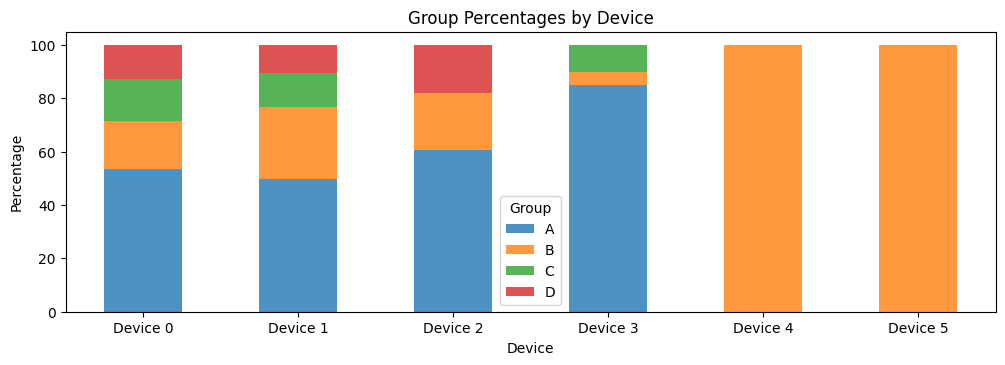

In [ ]:
# Device별 시각화
group_counts = df.groupby(['Device', 'Group']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(12, 8))

# 비율 그래프 그리기
bars = group_percentages.plot(kind='bar', stacked=True, alpha=0.8, ax=plt.subplot(212))
plt.title('Group Percentages by Device')
plt.xlabel('Device')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Group')

- Device 0 외의 장치들 모두 IN(인도) 데이터 이므로, 위에서 시각화한 IN(인도) 데이터 내 Group별 빈도수와 비슷한 양상을 보임
- Device(장치) 구분에 따른 Group 빈도수 차이를 판단하기 어려움
- 대부분 인도(IN) 데이터이므로, A그룹이 대다수일 것을 고려하여 이후 분석 과정에서는 인도를 제외하고 진행 과정 추가(변수들과 group 관계를 상세히 보기 위함)

In [ ]:
df_else = df.drop(df[df['Country Iso Code']== 'IN'].index) # 인도 제외 데이터

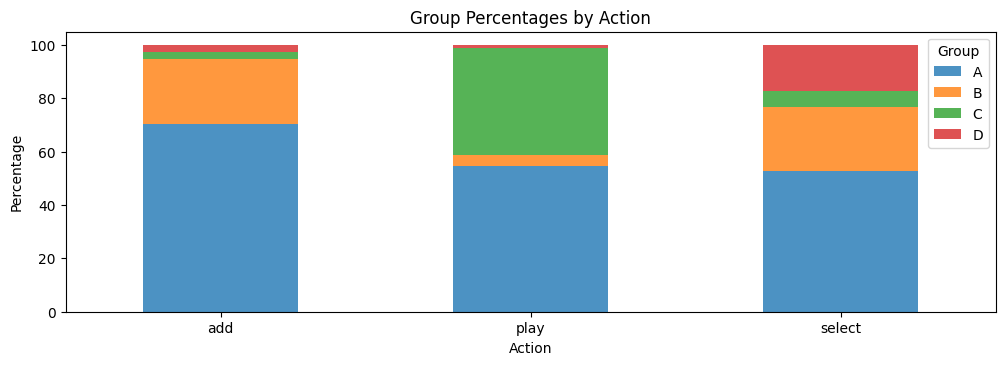

In [ ]:
# Action별 시각화(인도 포함)
group_counts = df.groupby(['Action', 'Group']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(12, 8))

# 비율 그래프 그리기
bars = group_percentages.plot(kind='bar', stacked=True, alpha=0.8, ax=plt.subplot(212))
plt.title('Group Percentages by Action')
plt.xlabel('Action')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Group')

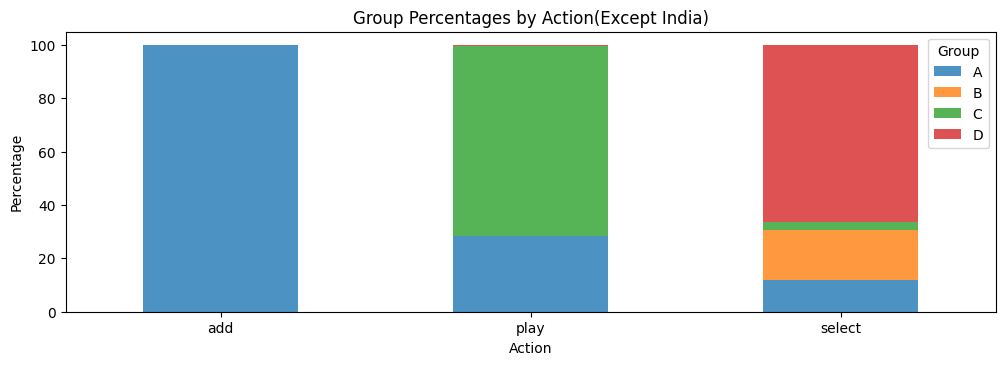

In [ ]:
# Action별 시각화(인도 제외)
group_counts = df_else.groupby(['Action', 'Group']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(12, 8))

# 비율 그래프 그리기
bars = group_percentages.plot(kind='bar', stacked=True, alpha=0.8, ax=plt.subplot(212))
plt.title('Group Percentages by Action (Except India)')
plt.xlabel('Action')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Group')

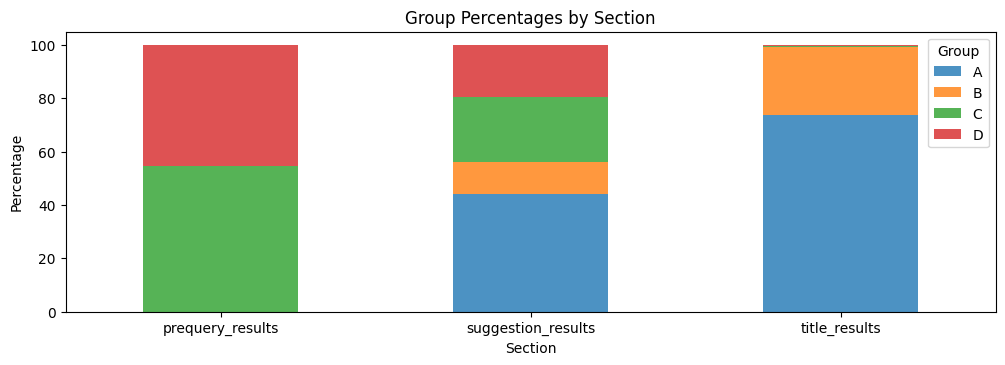

In [ ]:
# Section별 시각화(인도 포함)
group_counts = df.groupby(['Section', 'Group']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(12, 8))

# 비율 그래프 그리기
bars = group_percentages.plot(kind='bar', stacked=True, alpha=0.8, ax=plt.subplot(212))
plt.title('Group Percentages by Section')
plt.xlabel('Section')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Group')

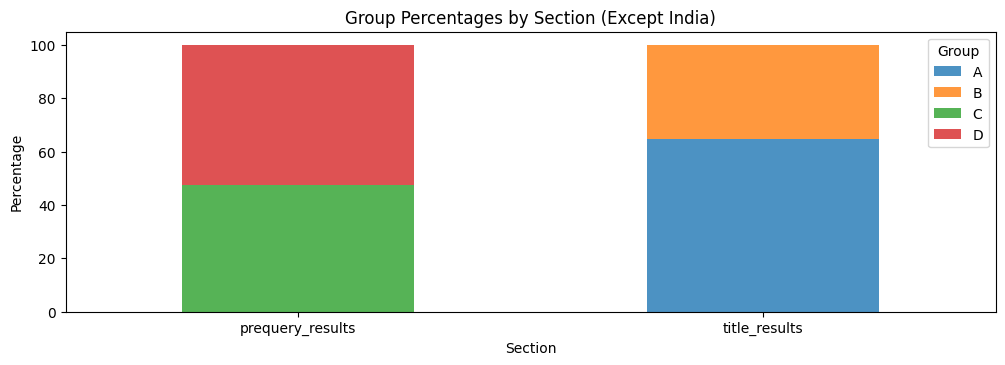

In [ ]:
# Section별 시각화(인도 제외)
group_counts = df_else.groupby(['Section', 'Group']).size().unstack(fill_value=0)
group_percentages = group_counts.div(group_counts.sum(axis=1), axis=0) * 100

# 시각화
plt.figure(figsize=(12, 8))

# 비율 그래프 그리기
bars = group_percentages.plot(kind='bar', stacked=True, alpha=0.8, ax=plt.subplot(212))
plt.title('Group Percentages by Section (Except India)')
plt.xlabel('Section')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Group')

- title_results : A,B그룹(검색 기능 이용도 높은 그룹)으로 이루어져있음
- prequery_result : C,D그룹(자동 생성 기능 이용도 높은 그룹)으로 이루어져있음
- suggestion_results은 모두 IN(인도) 데이터

## 주요 검색 키워드 분석
---
- 텍스트 데이터 세부 분석
    - 전체 키워드 추출
    - 인도 제외 키워드 추출

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#결측치 제거
df_kw = df.dropna(subset=['Query Typed']).reset_index(drop=True)

# TF-IDF 변환
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_kw['Query Typed'])

# TF-IDF 행렬에서 가장 높은 값을 가진 단어 추출
feature_names = tfidf_vectorizer.get_feature_names_out()
max_tfidf = tfidf_matrix.max(axis=0).toarray().flatten()

# 가장 높은 TF-IDF 값을 가진 단어 인덱스 추출 및 단어 출력
top_keywords_indices = max_tfidf.argsort()[-10:][::-1]
top_keywords = [feature_names[idx] for idx in top_keywords_indices]

print("주요 검색 키워드:", top_keywords,'\n')

########################################################################################################################

# 인도 제외
df_else = df_kw.drop(df_kw[df_kw['Country Iso Code']== 'IN'].index)

# TF-IDF 변환
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_else['Query Typed'])

# TF-IDF 행렬에서 가장 높은 값을 가진 단어 추출
feature_names = tfidf_vectorizer.get_feature_names_out()
max_tfidf = tfidf_matrix.max(axis=0).toarray().flatten()

# 가장 높은 TF-IDF 값을 가진 단어 인덱스 추출 및 단어 출력
top_keywords_indices = max_tfidf.argsort()[-10:][::-1]
top_keywords = [feature_names[idx] for idx in top_keywords_indices]

print("주요 검색 키워드(인도 제외):", top_keywords)

주요 검색 키워드: ['wr', 'indiana', 'haunt', 'hero', 'high', 'hindi', 'ho', 'horror', 'hotel', 'indi'] 

주요 검색 키워드(인도 제외): ['thr', 'dasvi', 'izom', 'it', 'ho', 'hero', 'fri', 'fr', 'fleab', 'flash']
